In [1]:
import nltk
nltk.download('cess_esp')
import matplotlib.pyplot as plt
import re
from unidecode import unidecode
import numpy as np
import pandas as pd

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from nltk.corpus import cess_esp

In [4]:
sample_sentences = cess_esp.sents()

# Obtención de la distribución de caracteres:
Se usara un corpus de textos en español para obtener una distribución experimental de los caracteres en ese idioma. 

In [5]:
def word_preprocessing(word):
  word = unidecode(word)
  word = word.upper()
  return word

In [6]:
sample_sentences = [[word_preprocessing(word) for word in sentence] for sentence in sample_sentences] # remove accents and diacritics

In [7]:
s = " "
sample_sentences = [s.join(sentence) for sentence in sample_sentences] # join the word in order to have one list per sentence

In [8]:
# re.sub("[-_.,'?¿¡!0-9 ]{1,}",'',sample_sentences[0])
sample_sentences = [re.sub("[-_.,'?¿¡!0-9+/*\"\'{(#)}%&=~:;| ]{1,}",'',sentence) for sentence in sample_sentences] # remove everything expect for letters

In [9]:
# count the ocurrenced of each word and store it in a dictionary 
total_corpus = ""
for sentence in sample_sentences:
  total_corpus += sentence

In [10]:
alpha = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","Ñ","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

In [11]:
len(alpha)

27

In [12]:
def get_letter_distribution(corpus,alphabet = alpha):
  letter_distribution = dict()
  for symbol in alphabet:
    letter_distribution[symbol] = 0
  for character in corpus:
    letter_distribution[character]+=1
  corpus_df = corpus_df = pd.DataFrame(letter_distribution.items(),columns=["Symbol","Frequency"]).sort_values(by="Frequency",ascending=False,ignore_index=True)
  return corpus_df


In [13]:
corpus_dist = get_letter_distribution(total_corpus)

In [14]:
corpus_dist.head()

,Symbol,Frequency
0,E,112584
1,A,105361
2,O,78804
3,N,61461
4,S,61407


# Obtención de distribución del texto cifrado: 
Se usara un preprocesamiento similar a aquel que se hizo con el corpus para obtener una distribución de los caracteres más comunes y compararlos

In [15]:
handler = open("/content/drive/MyDrive/Colab Notebooks/Cryptoanalisis Goalberto/CifradoGoalberto.txt")

In [16]:
cipher_sentences = [line for line in handler]

In [17]:
cipher_sentences = cipher_sentences[0]

In [18]:
len(cipher_sentences)

12199

In [19]:
#cipher_sentences_processed = [sentence.replace(" ",'') for sentence in cipher_sentences]
cipher_sentences_processed = cipher_sentences.replace(" ",'')

In [20]:
len(cipher_sentences_processed)

10282

In [21]:
cipher_text = cipher_sentences_processed
#for sentence in cipher_sentences_processed:
#  cipher_text += sentence

In [22]:
set(cipher_text)

{'!',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '+',
 ',',
 '-',
 '/',
 ':',
 ';',
 '=',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '{',
 '|',
 '}',
 '~',
 '¬',
 '°',
 '¿',
 '“',
 '”'}

In [23]:
def get_cipher_text_distribution(cipher_text):
  cipher_dict = dict()
  alphabet = set(cipher_text)
  for symbol in alphabet:
    cipher_dict[symbol] = 0
  for character in cipher_text:
    cipher_dict[character]+=1
  cipher_df = pd.DataFrame(cipher_dict.items(),columns=["Symbol","Frequency"]).sort_values(by="Frequency",ascending=False,ignore_index=True)
  return cipher_df

In [24]:
cipher_dist = get_cipher_text_distribution(cipher_text)

In [25]:
cipher_dist.head()

,Symbol,Frequency
0,;,1327
1,$,1235
2,&,926
3,+,870
4,#,801


# Frequencias: 

Text(0.5, 1.0, 'Frequencia del Mensaje Cifrado')

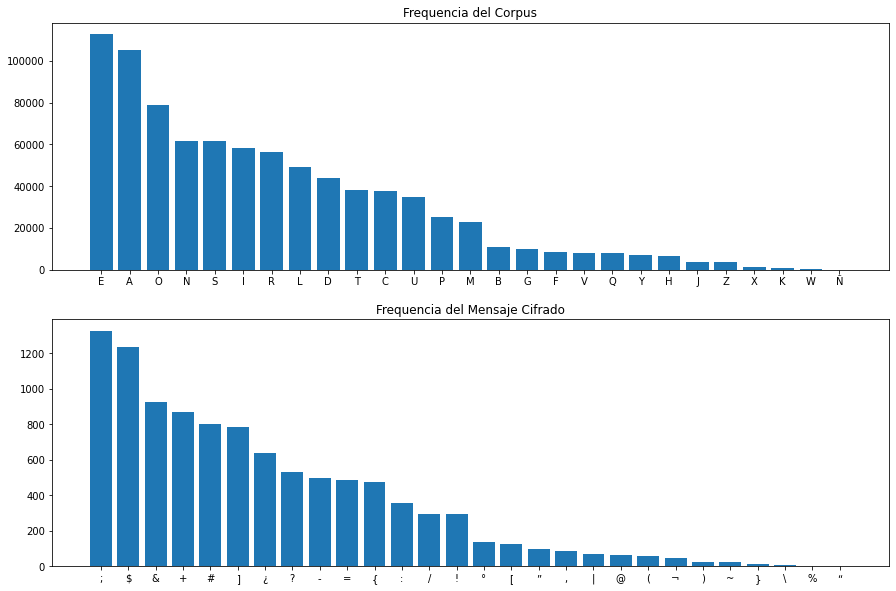

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.bar(corpus_dist["Symbol"],corpus_dist["Frequency"])
plt.title("Frequencia del Corpus")
plt.subplot(2,1,2)
plt.bar(cipher_dist["Symbol"],cipher_dist["Frequency"])
plt.title("Frequencia del Mensaje Cifrado")

In [27]:
corpus_symbols_sorted = list(corpus_dist["Symbol"])
cipher_symbols_sorted = list(cipher_dist["Symbol"][:-1])

In [28]:
print(len(corpus_symbols_sorted))
print(len(cipher_symbols_sorted))


27
27


In [29]:
traducer = dict(zip(cipher_symbols_sorted,corpus_symbols_sorted))

In [30]:
traducer

{';': 'E',
 '$': 'A',
 '&': 'O',
 '+': 'N',
 '#': 'S',
 ']': 'I',
 '¿': 'R',
 '?': 'L',
 '-': 'D',
 '=': 'T',
 '{': 'C',
 ':': 'U',
 '/': 'P',
 '!': 'M',
 '°': 'B',
 '[': 'G',
 '”': 'F',
 ',': 'V',
 '|': 'Q',
 '@': 'Y',
 '(': 'H',
 '¬': 'J',
 ')': 'Z',
 '~': 'X',
 '}': 'K',
 '\\': 'W',
 '%': 'Ñ'}

In [31]:
cipher_sentences

'$:#@:; #:;+-¿$+ °]?$+ +; °];¿&# ${-;¿$?$+ ;# ;{ ?&+ !]{ °;]#-; {$ ]#?:+-¿]$ ?; {$ =]”;¿+;[:¿]?$? °&{°]& =&# ,:;¿¬$ ;# ?&+ !]{ °;]#-]:#& !$#?]$#- $=;/-& ;{ ¿;-& ?; -¿$”$)$¿ ;# =]¿=:#+-$#=]$+ +];!/¿; =$!”]$#-;+ +]# ?;)$¿ ?; &,¿;=;¿ $ {&+ ={];#-;+ +;¿°]=]&+ ?; /¿]!;¿$ =${]?$? @:; +; $+&=]$# =&# #:;+-¿&+ ;~/;¿-&+ ;# =]”;¿+;[:¿]?$? {$+ ;~/;=-$-]°$+ +&# ,:#?$!;#-${;+ :#$ =&+$ =&# {$ @:; +];!/¿; /&?;!&+ =&#-$¿ ;+ ;{ #]°;{ ?; ]#=;¿-]?:!”¿; ;# ;{ $!”]-& =]”;¿#;-]=& {&+ $-$=$#-;+ =$!”]$# ¿;[:{$¿!;#-; +:+ -$=-]=$+ -;=#]=$+ | /¿&=;?]!];#-&+ /$¿$ ;°$?]¿ {$ ?;-;==]&# ?;)$#?& $ {&+ ?;,;#+&¿;+ {:=($#?& /$¿$ +;[:]¿ ;{ ¿]-!& =:$#?& !$#?]$#- $|:?$ $ ¿;?:=]¿ ;+$ “¿;=($ =&!/$¿-];#?& #:;+-¿&+ $/¿;#?]¬$);+ | ;~/;=-$-]°$+ ]#,&¿!$?&+ | ¿;+/${?$?&+ /&¿ /¿:;”$+ -$!”];# $°$#¬$!&+ ;# {$ !]+]&# ?; !$#?]$#- ($=;¿ @:; -&?$+ {$+ &¿[$#]¬$=]&#;+ ;+-;# +;[:¿$+ =&#-¿$ {$+ =]”;¿$!;#$¬$+ | =&#,];# ;# +: /¿;/$¿$=]&# ;{ ]#,&¿!; ?; ;+-; $%& =$-&¿=; /¿;?]==]&#;+ ?; =]”;¿+;[:¿]?$? /$¿$ ?&+ !]{ °;]#-]?&+ | !$+ ${{$ /¿;+;#-$ !$+ 

In [33]:
decoded = ""
for character in cipher_sentences:
  if character == " ":
    decoded += character
  elif character == "“":
    continue
  else:
    decoded += traducer[character]

In [34]:
decoded

'AUSYUE SUENDRAN BILAN NE BIEROS ACDERALAN ES EC LON MIC BEISDE CA ISLUNDRIA LE CA TIFERNEGURILAL BOCBIO TOS VUERJA ES LON MIC BEISDIUSO MASLIASD ATEPDO EC REDO LE DRAFAZAR ES TIRTUSNDASTIAN NIEMPRE TAMFIASDEN NIS LEZAR LE OVRETER A CON TCIESDEN NERBITION LE PRIMERA TACILAL YUE NE ANOTIAS TOS SUENDRON EXPERDON ES TIFERNEGURILAL CAN EXPETDADIBAN NOS VUSLAMESDACEN USA TONA TOS CA YUE NIEMPRE POLEMON TOSDAR EN EC SIBEC LE ISTERDILUMFRE ES EC AMFIDO TIFERSEDITO CON ADATASDEN TAMFIAS REGUCARMESDE NUN DATDITAN DETSITAN Q PROTELIMIESDON PARA EBALIR CA LEDETTIOS LEZASLO A CON LEVESNOREN CUTHASLO PARA NEGUIR EC RIDMO TUASLO MASLIASD AQULA A RELUTIR ENA RETHA TOMPARDIESLO SUENDRON APRESLIJAZEN Q EXPETDADIBAN ISVORMALON Q RENPACLALON POR PRUEFAN DAMFIES ABASJAMON ES CA MINIOS LE MASLIASD HATER YUE DOLAN CAN ORGASIJATIOSEN ENDES NEGURAN TOSDRA CAN TIFERAMESAJAN Q TOSVIES ES NU PREPARATIOS EC ISVORME LE ENDE AÑO TADORTE PRELITTIOSEN LE TIFERNEGURILAL PARA LON MIC BEISDILON Q MAN ACCA PRENESDA MAN L